<a href="https://colab.research.google.com/github/junhansong/deeplearning/blob/master/deeplearning/run_project/21_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 호출


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np



### MNIST데이터 셋을 불러옵니다.



In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255



11493376/11490434 [==============================] - 0s 0us/step


### 생성자 모델을 만듭니다.


In [0]:
autoencoder = Sequential()



### 인코딩 부분입니다.


In [0]:
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))



### 디코딩 부분이 이어집니다. 


In [0]:
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))



### 전체 구조를 확인해 봅니다.


In [6]:
autoencoder.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

### 컴파일 및 학습을 하는 부분입니다.


In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))



Epoch 1/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2061 - val_loss: 0.1375
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1270 - val_loss: 0.1174
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1139 - val_loss: 0.1083
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1065 - val_loss: 0.1025
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1022 - val_loss: 0.0995
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0992 - val_loss: 0.0971
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0969 - val_loss: 0.0947
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0952 - val_loss: 0.0931
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0937 - val_loss: 0.0917
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0924 - val_loss: 0.090

### 학습된 결과를 출력하는 부분입니다.


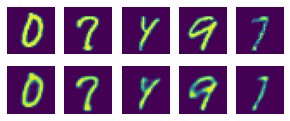

In [8]:
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()
